In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Functions

In [13]:
def plot_one_distribution(df, x_col):
    """

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data to be plotted.
    x_col (str): The name of the column containing the first continuous variable.

    Returns:
    None
    """
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=x_col, label=x_col)
    
    #add lines 
    x_avg = df[x_col].mean()
    x_median = df[x_col].median()
    plt.axvline(x_avg, linestyle='--', label=f'{x_col} mean')
    plt.axvline(x_median, linestyle='-', label=f'{x_col} median')
    
    #add values
    plt.text(x_avg, 100, f'Avg. = {x_avg:.2f}', va='top', ha='center')
    plt.text(x_median, 300, f'Median = {x_median:.2f}', va='top', ha='center')
    
    plt.title("Distribution of {}".format(x_col))
    plt.legend()
    plt.show()

# Reading data

In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [4]:
!wget $data

--2023-09-23 10:28:33--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1,4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1,36M  2,12MB/s    in 0,6s    

2023-09-23 10:28:34 (2,12 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



In [5]:
df = pd.read_csv('housing.csv')
df.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# EDA

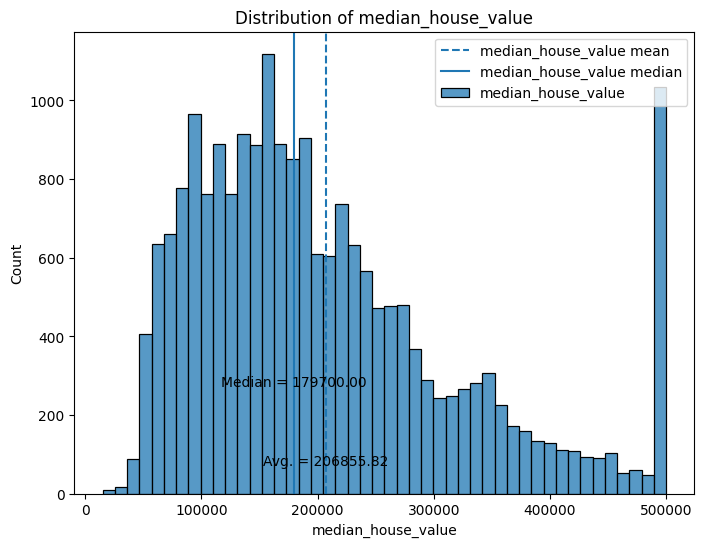

In [14]:
plot_one_distribution(df, 'median_house_value')

The distribution has a long tail and a peak in the end of the tail which means that the prices were capped at 500000, and we don't know the 'real' prices for some houses

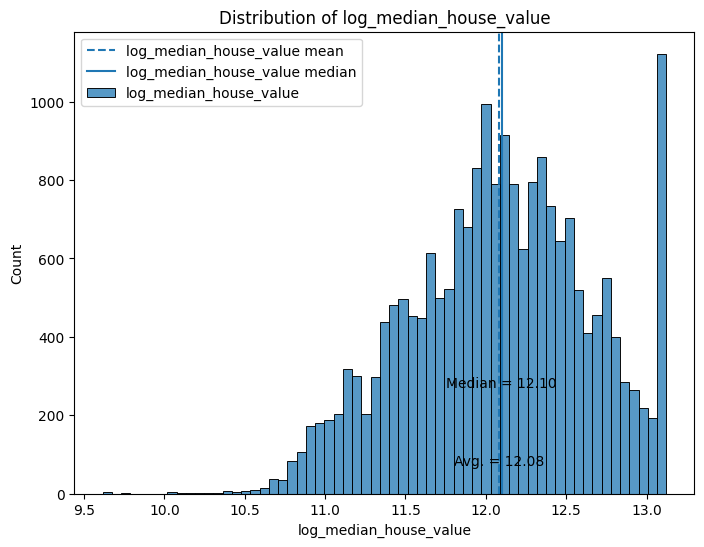

In [15]:
df['log_median_house_value'] = np.log1p(df['median_house_value'])
plot_one_distribution(df, 'log_median_house_value')

# Prepare and split the dataset

## Filter df

In [16]:
df['ocean_proximity'].value_counts(dropna=False)

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [17]:
mask_filter = df['ocean_proximity'].isin(['<1H OCEAN','INLAND'])
ocean_inland = df[mask_filter][['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
                               'population', 'households', 'median_income', 'median_house_value']].copy()
ocean_inland.head(3)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0


In [18]:
ocean_inland.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Q1: total_bedrooms has missing values

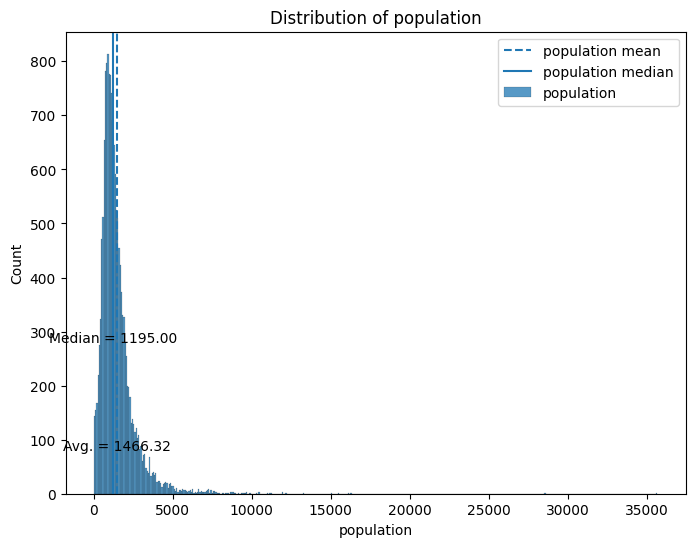

In [19]:
plot_one_distribution(ocean_inland, 'population')

Q2: The median value of population = 1195

## DF split

In [161]:
#get indexes
n = len(ocean_inland)
idx = np.arange(n)
#shuffle them
np.random.seed(42)
np.random.shuffle(idx)

In [162]:
#Split your data in train/val/test sets, with 60%/20%/20% distribution
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - n_val - n_train

In [163]:
idx

array([15183,  4469,  9316, ...,  5390,   860,  7270])

In [165]:
df_train = ocean_inland.iloc[idx[:n_train],:]
df_val = ocean_inland.iloc[idx[n_train:n_train+n_val]]
df_test = ocean_inland.iloc[idx[n_train+n_val:]]

In [166]:
len(df_train), len(df_val), len(df_test), len(df_train)+len(df_val)+len(df_test) == n

(9412, 3137, 3138, True)

In [167]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [168]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
1,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
2,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
3,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
4,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [169]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [170]:
y_train

array([11.16196275, 12.32163544, 12.4718963 , ..., 10.61890979,
       13.12236738, 12.11888489])

In [171]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# Training the model

## Dealing with missing values

In [172]:
df_train.isna().sum()

latitude               0
longitude              0
housing_median_age     0
total_rooms            0
total_bedrooms        94
population             0
households             0
median_income          0
dtype: int64

In [173]:
mean_total_bedrooms = df_train['total_bedrooms'].mean()
df_train['total_bedrooms_na_mean'] = df_train['total_bedrooms'].fillna(mean_total_bedrooms)
df_train['total_bedrooms_na_0'] = df_train['total_bedrooms'].fillna(0)

df_val['total_bedrooms_na_mean'] = df_val['total_bedrooms'].fillna(mean_total_bedrooms)
df_val['total_bedrooms_na_0'] = df_val['total_bedrooms'].fillna(0)

In [174]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [175]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

### Train with mean instead of NA

In [176]:
X_train = df_train.drop(['total_bedrooms', 'total_bedrooms_na_0'], axis=1)
X_train = X_train.values

#train the model
w0, w = train_linear_regression(X_train, y_train)

In [177]:
#prepare validation df
X_val = df_val.drop(['total_bedrooms', 'total_bedrooms_na_0'], axis=1)
X_val = X_val.values

#get predicitons for validation df
y_pred = w0 + X_val.dot(w)

In [178]:
round(rmse(y_val, y_pred),2)

0.34

### Train with 0 instead of NA

In [179]:
X_train = df_train.drop(['total_bedrooms', 'total_bedrooms_na_mean'], axis=1)
X_train = X_train.values

#train the model
w0, w = train_linear_regression(X_train, y_train)

In [180]:
#prepare validation df
X_val = df_val.drop(['total_bedrooms', 'total_bedrooms_na_mean'], axis=1)
X_val = X_val.values

#get predicitons for validation df
y_pred = w0 + X_val.dot(w)

In [181]:
round(rmse(y_val, y_pred),2)

0.34

Q3: Both options are equally good for filling NA values

In [182]:
def prepare_df(df, random_seed=42):
    #get indexes
    n = len(df)
    idx = np.arange(n)
    #shuffle them
    np.random.seed(random_seed)
    np.random.shuffle(idx)
    
    #Split your data in train/val/test sets, with 60%/20%/20% distribution
    n_train = int(n * 0.6)
    n_val = int(n * 0.2)
    n_test = n - n_val - n_train

    df_train = ocean_inland.iloc[idx[:n_train],:].reset_index(drop=True)
    df_val = ocean_inland.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    df_test = ocean_inland.iloc[idx[n_train+n_val:]].reset_index(drop=True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    
    df_train['total_bedrooms'] = df_train['total_bedrooms'].fillna(0)
    df_val['total_bedrooms'] = df_val['total_bedrooms'].fillna(0)
    df_test['total_bedrooms'] = df_test['total_bedrooms'].fillna(0)

    return df_train, df_val, df_test, y_train, y_val, y_test

## Regularization

In [183]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    # add regularisation parameter so that columns become different
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [184]:
X_train = df_train.drop(['total_bedrooms', 'total_bedrooms_na_mean'], axis=1)
X_train = X_train.values
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

#prepare validation df
X_val = df_val.drop(['total_bedrooms', 'total_bedrooms_na_mean'], axis=1)
X_val = X_val.values

y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.34095384832345144

In [185]:
results_list = []

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    print(f'Model for r = {r}')
    
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_val.dot(w)
    rmse_val = round(rmse(y_val, y_pred),2)
    print(f'RMSE = {rmse_val}\n')

    result_dict = {
                    'r': r,
                    'rmse': rmse_val
    }
    
    results_list.append(result_dict)

Model for r = 0
RMSE = 0.34

Model for r = 1e-06
RMSE = 0.34

Model for r = 0.0001
RMSE = 0.34

Model for r = 0.001
RMSE = 0.34

Model for r = 0.01
RMSE = 0.34

Model for r = 0.1
RMSE = 0.34

Model for r = 1
RMSE = 0.34

Model for r = 5
RMSE = 0.35

Model for r = 10
RMSE = 0.35



In [186]:
results_df = pd.DataFrame(results_list)

Text(0.5, 0, 'Regularization parameter r')

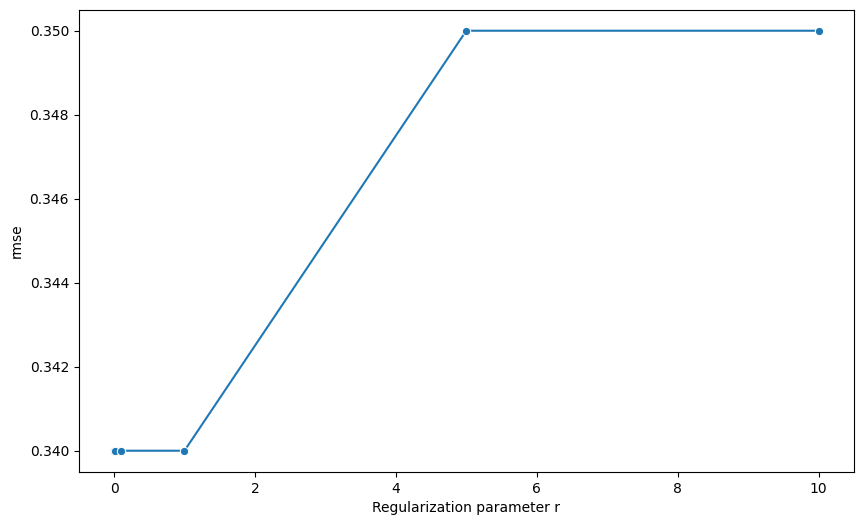

In [187]:
fig, ax = plt.subplots(1, figsize=(10,6))
sns.lineplot(
    data=results_df, 
    x="r", y="rmse",
    marker="o",
    ax=ax
)
ax.set_xlabel(f"Regularization parameter r")

Q4: With this linear regression, the regularization parameter doesn't improve the RMSE, so we can remain it at 0

## Trying different seeds

To try different seeds, we need to wrap all our steps into the function

In [188]:
seeds_results_list = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, df_val, df_test, y_train, y_val, y_test = prepare_df(ocean_inland, random_seed=seed)
    
    print(f'Model for seed = {seed}')
    X_train = df_train.values
    X_val = df_val.values
    
    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred)
    print(f'RMSE = {rmse_val:.2f}\n')

    result_dict = {
                    'random_seed': seed,
                    'rmse': rmse_val
    }
    
    seeds_results_list.append(result_dict)

Model for seed = 0
RMSE = 0.34

Model for seed = 1
RMSE = 0.34

Model for seed = 2
RMSE = 0.34

Model for seed = 3
RMSE = 0.33

Model for seed = 4
RMSE = 0.34

Model for seed = 5
RMSE = 0.34

Model for seed = 6
RMSE = 0.34

Model for seed = 7
RMSE = 0.35

Model for seed = 8
RMSE = 0.35

Model for seed = 9
RMSE = 0.33



In [189]:
seed_results_df = pd.DataFrame(seeds_results_list)

Text(0.5, 0, 'Random seed')

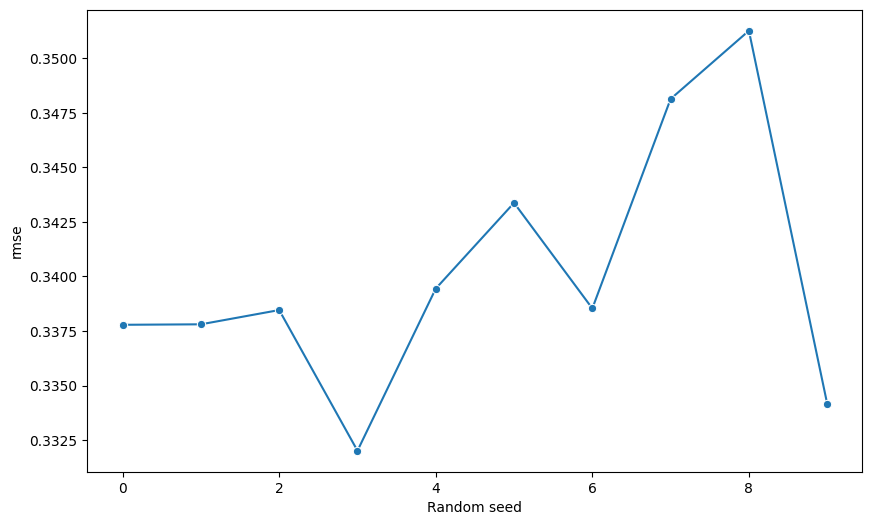

In [190]:
fig, ax = plt.subplots(1, figsize=(10,6))
sns.lineplot(
    data=seed_results_df, 
    x="random_seed", y="rmse",
    marker="o",
    ax=ax
)
ax.set_xlabel(f"Random seed")

In [191]:
round(np.std(seed_results_df['rmse'].values),3)

0.006

Q5: Standard deviation of RMSE for 10 different seeds is 0.006 (or 0.005 the closest)

## Final model

In [192]:
df_train, df_val, df_test, y_train, y_val, y_test = prepare_df(ocean_inland, random_seed=9)

In [194]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

y_full_train = np.concatenate([y_train, y_val])

In [195]:
X_full_train = df_full_train.values
X_test = df_test.values

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
y_pred = w0 + X_test.dot(w)
rmse_val = round(rmse(y_test, y_pred),2)
print(f'RMSE = {rmse_val}\n')

RMSE = 0.33



Q6: RMSE on the test dataset is 0.33